<a href="https://colab.research.google.com/github/G2TECH/-LGMVIP--DataScience/blob/main/task_9_Model_Training_%26_CNN_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pickle

In [4]:
df_train=pd.read_csv('/content/train_final (1).csv',index_col=False)
labels=df_train[['784']]

In [ ]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,232,232,232,232,232,232,232,232,232,232,232,232,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,255,255,255,255,255,255,255,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,50,132,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,255,191,191,191,64,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,232,232,232,232,232,232,232,232,232,232,232,232,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,255,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178,86,77,77,77,77,77,77,77,77,77,77,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [6]:
labels=np.array(labels)

In [7]:
from keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=13)

In [8]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [9]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [10]:
df_train.shape

(47504, 785)

In [11]:
temp=df_train.to_numpy()

In [18]:
# Step 7: Extract and save the images from the dataset
X_train = []
for index, row in df_train.iterrows():
    image_data = np.array(row[1:]).reshape(28, 28).astype(np.uint8)
    X_train.append(image_data)
X_train = np.array(X_train)

# Step 8: Reshape the input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

# Step 9: Build the CNN model
# ... (rest of the code remains the same)


In [14]:
temp.shape[0]

47504

In [22]:
X_train.shape

(47504, 28, 28, 1)

In [19]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
from keras.models import model_from_json

In [24]:
model.fit(X_train, cat, epochs=10, batch_size=200,shuffle=True,verbose=1)

Epoch 1/10
238/238 [==============================] - 43s 170ms/step - loss: 1.3518 - accuracy: 0.6868
Epoch 2/10
238/238 [==============================] - 39s 165ms/step - loss: 0.2480 - accuracy: 0.9256
Epoch 3/10
238/238 [==============================] - 36s 152ms/step - loss: 0.1450 - accuracy: 0.9569
Epoch 4/10
238/238 [==============================] - 39s 163ms/step - loss: 0.1003 - accuracy: 0.9701
Epoch 5/10
238/238 [==============================] - 36s 151ms/step - loss: 0.0762 - accuracy: 0.9772
Epoch 6/10
238/238 [==============================] - 38s 161ms/step - loss: 0.0618 - accuracy: 0.9811
Epoch 7/10
238/238 [==============================] - 36s 152ms/step - loss: 0.0501 - accuracy: 0.9844
Epoch 8/10
238/238 [==============================] - 38s 160ms/step - loss: 0.0450 - accuracy: 0.9860
Epoch 9/10
238/238 [==============================] - 36s 152ms/step - loss: 0.0382 - accuracy: 0.9882
Epoch 10/10
238/238 [==============================] - 37s 156ms/step - l

In [25]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [26]:
import cv2
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
# K.set_image_dim_ordering('th')
from keras.models import model_from_json

In [27]:
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_final.h5")

In [28]:
print(5)

5


In [29]:
import cv2
import numpy as np
img = cv2.imread('test.jpg',cv2.IMREAD_GRAYSCALE)

In [30]:
img

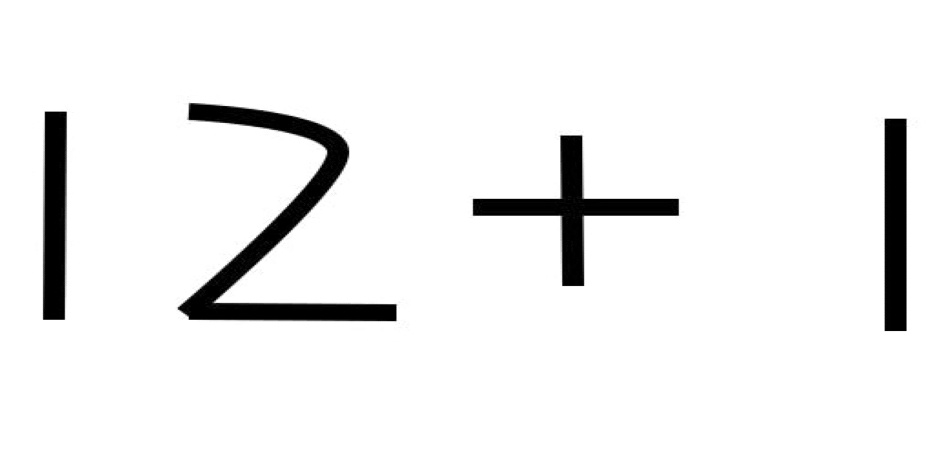

In [52]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/test.jpeg', cv2.IMREAD_GRAYSCALE)

# Display the image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Preprocess the image
if img is not None:
    img = ~img
    ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w = int(28)
    h = int(28)
    train_data = []
    rects = []
    
    for c in cnt:
        x, y, w, h = cv2.boundingRect(c)
        rect = [x, y, w, h]
        rects.append(rect)
    
    bool_rect = []
    
    for r in rects:
        l = []
        for rec in rects:
            flag = 0
            if rec != r:
                if r[0] < (rec[0] + rec[2] + 10) and rec[0] < (r[0] + r[2] + 10) and r[1] < (rec[1] + rec[3] + 10) and rec[1] < (r[1] + r[3] + 10):
                    flag = 1
                l.append(flag)
            if rec == r:
                l.append(0)
        bool_rect.append(l)
    
    dump_rect = []
    
    for i in range(0, len(cnt)):
        for j in range(0, len(cnt)):
            if bool_rect[i][j] == 1:
                area1 = rects[i][2] * rects[i][3]
                area2 = rects[j][2] * rects[j][3]
                if area1 == min(area1, area2):
                    dump_rect.append(rects[i])
    
    final_rect = [i for i in rects if i not in dump_rect]
    
    for r in final_rect:
        x = r[0]
        y = r[1]
        w = r[2]
        h = r[3]
        im_crop = thresh[y:y+h+10, x:x+w+10]
        im_resize = cv2.resize(im_crop, (28, 28))
        
        cv2_imshow(im_resize)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        im_resize = np.reshape(im_resize, (1, 28, 28))
        train_data.append(im_resize)


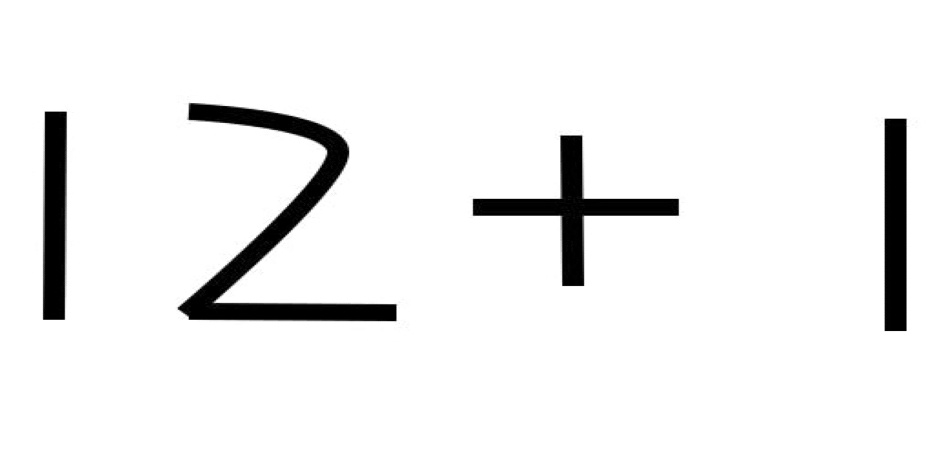

In [55]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/test.jpeg', cv2.IMREAD_GRAYSCALE)

# Display the image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Preprocess the image
if img is not None:
    img = cv2.bitwise_not(img)
    ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w = int(28)
    h = int(28)
    train_data = []
    rects = []

    for c in cnt:
        x, y, w, h = cv2.boundingRect(c)
        rect = [x, y, w, h]
        rects.append(rect)

    for r in rects:
        x = r[0]
        y = r[1]
        w = r[2]
        h = r[3]
        im_crop = thresh[y:y + h + 10, x:x + w + 10]
        im_resize = cv2.resize(im_crop, (28, 28))

        cv2_imshow(im_resize)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        im_resize = np.reshape(im_resize, (1, 28, 28))
        train_data.append(im_resize)


In [56]:
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    #result=loaded_model.predict_classes(train_data[i])
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        s=s+'-'
    if(result[0]==11):
        s=s+'+'
    if(result[0]==12):
        s=s+'*'
    if(result[0]==0):
        s=s+'0'
    if(result[0]==1):
        s=s+'1'
    if(result[0]==2):
        s=s+'2'
    if(result[0]==3):
        s=s+'3'
    if(result[0]==4):
        s=s+'4'
    if(result[0]==5):
        s=s+'5'
    if(result[0]==6):
        s=s+'6'
    if(result[0]==7):
        s=s+'7'
    if(result[0]==8):
        s=s+'8'
    if(result[0]==9):
        s=s+'9'
    
print(s)

1/1 [==============================] - 0s 30ms/step
82+8


In [57]:
eval(s)



90